### Simulate stock prices under BS model

1. Simulate $\{Z_i\}_{i=1}^n$ that are i.i.d $\mathcal{N}(0,1)$.
2. $S_i(T) = S_0\exp(\sigma\sqrt{T}Z_i-\frac{1}{2}\sigma^2 T+rT), i=1, \dots, n$. Then we have a sample of size $n$. 
3. Compute the payoff $X$ based on the stock price for each $i=1, \dots, n$: $X_i = H(S_i(T))$ where $H$ is a function. 
4. Compute the unique arbitrage free initial price: $V_0=e^{-rT}E^*[X]$.

Note: another way to write $S_i(T) = S_0\exp((r-\frac{1}{2}\sigma^2)T+\sigma\sqrt{T}Z_i), i=1, \dots, n$.

In [1]:
import numpy as np

In [2]:
# Set parameters
T = 7  # time to maturity
S0 = 20  # initial stock price
K = 20  # strike price
r = 0.1  # interest rate
sig = 1  # standard deviation (volatility)
M = 10000  # number of Monte Carlo sample

In [3]:
# Simulate the stock prices for European derivative (with final payoff)
np.random.seed(123)
Z = np.random.normal(0, 1, M)
ST = S0 * np.exp(sig * np.sqrt(T) * Z - 0.5 * sig ** 2 * T + r * T)

In [4]:
Z.shape

(10000,)

In [5]:
ST.shape

(10000,)

In [6]:
# European Call Option
X = np.maximum(ST - K, 0)
EC0 = np.exp(-r * T) * np.mean(X)

In [7]:
print('The unique arbitrage free initial price for this European call option is:', round(EC0, 2))

The unique arbitrage free initial price for this European call option is: 17.31


**What if the option pricing is path dependent?**
$$S_t = S_{t-\Delta t}\exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma\sqrt{\Delta t}z_t)$$ where Z_t is a sample from $\mathcal{N}(0,1)$.

Recursively, one can compute and get
\begin{align}
S_{\Delta t} &= S_{0}\exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma\sqrt{\Delta t}z_1)\\
S_{2\Delta t} &= S_{0}\exp((r-\frac{1}{2}\sigma^2)2\Delta t + \sigma\sqrt{\Delta t}z_1+\sigma\sqrt{\Delta t}z_2)\\
&=S_{0}\exp((r-\frac{1}{2}\sigma^2)2\Delta t + \sigma\sqrt{\Delta t}(z_1+z_2))
...\\
S_{k\Delta t} &= S_{0}\exp((r-\frac{1}{2}\sigma^2)k\Delta t + \sigma\sqrt{\Delta t}\sum_{i=1}^k z_k)
\end{align}

In [12]:
# Simulate the stock prices for Asian call option (depending on the price path)
dt = 0.1  # the increment in discretization
N = int(T / dt)  # the number of discrete times
Zt = np.random.normal(0, 1, size=(M, N))  # simulate all Zi's (Brownian Motion terms)
St = S0 * np.exp((r - sig ** 2 / 2) * np.arange(dt, T+dt, dt) + sig * np.sqrt(dt) * np.cumsum(Zt, axis=1))

In [13]:
print('St shape:', St.shape)

St shape: (10000, 70)


In [16]:
St[0,:]

array([32.86463877, 36.06587221, 48.19699436, 23.69478839, 15.15812405,
        9.72692876,  7.9625108 ,  7.207133  ,  7.31171033,  6.82549455,
        4.24056315,  4.91874443,  7.4312107 ,  9.64734507, 15.81770908,
       12.51928609, 12.96868407, 13.89162223, 13.66111984,  8.52411252,
       11.31594824, 11.33865305, 10.49972985, 10.91038888, 12.47046165,
       10.76632689,  7.31460034,  4.83259778,  4.6280983 ,  6.77520074,
        9.42866497,  8.53444996,  5.03865529,  4.83189404,  4.8335845 ,
        2.74604709,  3.18680749,  2.85385836,  4.81883222,  5.94167054,
        5.35307431,  4.40530547,  2.88742722,  2.09821812,  1.57122675,
        1.33452674,  0.78954519,  0.47372575,  0.59536307,  0.68498016,
        0.53673413,  0.37819426,  0.24950075,  0.27107007,  0.17496992,
        0.13616812,  0.21183195,  0.0845522 ,  0.10286046,  0.14632622,
        0.14664024,  0.20122238,  0.16525073,  0.11299399,  0.12117562,
        0.12891047,  0.10337493,  0.09096926,  0.12126403,  0.13

In [17]:
# Monte Carlo
AsianCall = np.maximum(np.mean(St,axis=1) - K, 0);  # simulated payoff at maturity
AsC0 = np.mean(AsianCall) / np.exp(T * r);  #estimated value at time zero

In [18]:
AsC0

9.175569917887975

## Simulate Stock Prices under BS model

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**option pricing is path dependent (dynamic Monte Carlo)**
$$S_t = S_{t-\Delta t}\exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma\sqrt{\Delta t}z_t)$$ where Z_t is a sample from $\mathcal{N}(0,1)$.

Parameters from the problem
- T  = ?
- S0 = ?
- K = ?
- r = ?
- sig = ?

Other parameters
- dt = ? the increment in discretization
- M = ? number of Monte Carlo sample path
- N = ? number of steps

### Example: Up-and-out call option

$$X=\text{ final payoff at }T=\max{(S_T-K, 0)}\mathbf{1}_{\{S_t\leq b\text{ for all }t\in[0,T]\}}.$$

Approximate $X=F(S_t:0\leq t\leq T)$ by 
$$\tilde{X}=\max{(\tilde{S}_{t_N}-K, 0)}\mathbf{1}_{\{\tilde{S}_{t_0}\leq b, \dots, \tilde{S}_{t_N}\leq b\}}=\tilde{F}(\tilde{S}_{t_0}, \dots,\tilde{S}_{t_N}).$$

$$E^*{X}=E^*[\tilde{X}]=\frac{1}{n}\sum_{i=1}^n\tilde{X}^{(i)}$$

In [20]:
# Set parameters
T = 5 # time to maturity
S0 = 20  # initial stock price
K = 23  # strike price
r = 0.1  # interest rate
sig = 0.2  # standard deviation (volatility)
M = 10000  # number of Monte Carlo sample paths

In [21]:
# Simulate the stock prices 
# Dynamic Monte Carlo
dt = 0.1  # the increment in discretization
N = int(T / dt)  # the number of discrete time steps
np.random.seed(7)
Zt = np.random.normal(0, 1, size=(M, N))  # simulate all Zi's (Brownian Motion terms)

# One way: Recursive step hidden in np.cumsum and np.arange
St = S0 * np.exp((r - sig ** 2 / 2) * np.arange(dt, T+dt, dt) + sig * np.sqrt(dt) * np.cumsum(Zt, axis=1))

$$S_t = S_{t-\Delta t}\exp((r-\frac{1}{2}\sigma^2)\Delta t + \sigma\sqrt{\Delta t}z_t)$$ where Z_t is a sample from $\mathcal{N}(0,1)$.

In [22]:
# The other way (following the recursive formula, directly)
St = np.zeros((M, N+1))
St[:,0] = S0
for i in range(1, N+1, 1):
    St[:, i] = St[:, i-1] * np.exp((r - 0.5 * sig ** 2) * dt + sig * np.sqrt(dt) * Zt[:, i-1])
    
print('stock price matrix dimension:', St.shape)

stock price matrix dimension: (10000, 51)


In [23]:
Zt.shape

(10000, 50)

[Text(0.5, 1.0, 'Histogram of sampled stock price at time T')]

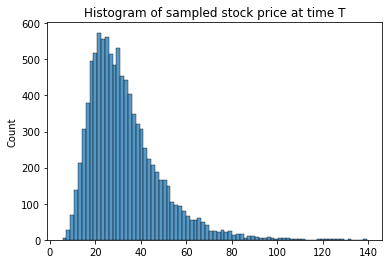

In [24]:
sns.histplot(St[:, -1]).set(title='Histogram of sampled stock price at time T')

In [25]:
b = 80

In [26]:
X = (np.max(St, axis=1) <= b) * np.maximum(St[:,-1] - K, 0)
est_X = np.mean(X)

In [27]:
len(X)

10000

[Text(0.5, 1.0, 'Histogram of the payoff at time T')]

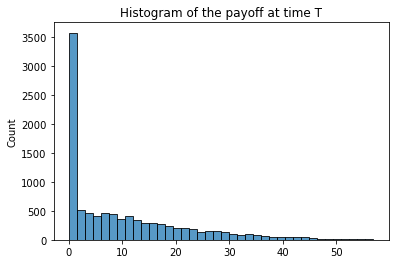

In [28]:
sns.histplot(X).set(title='Histogram of the payoff at time T')

In [29]:
est_X

10.078868042106162

### Example: Asian Call Option
$$X=\max{\left(\frac{1}{T}\int_0^T S_t dt-K, 0\right)}$$
- Let $A_T = \frac{1}{T}\int_0^T S_t dt$ and approximate $A_T$ by $\tilde{A}_T=\frac{1}{N}\sum_{j=1}^N\tilde{S}_{t_j-1}$.
- Approximate $X$ by $\tilde{X}=\max{(\frac{1}{N}\sum_{j=1}^N\tilde{S}_{t_j-1}-K, 0)}$.
- $E^*[X]\approx E^*[\tilde{X}]$.

In [30]:
# Monte Carlo
AsianCall = np.maximum(np.mean(St,axis=1) - K, 0);  # simulated payoff at maturity
AsC0 = np.mean(AsianCall) / np.exp(T * r);  # estimated arbitrage free initial price

In [31]:
AsC0

2.6545247527884634

## Simulations of solutions of stochastic differential equations
$$dX_t = \mu(t, X_t)dt + \sigma(t, X_t)dWt, \quad t\in[0,T]$$

For Black-Scholes model, $X_t=S_t, \mu(t, X_t)=rX_t, \sigma(t, X_t)=\sigma X_t$.

**Example**
$$dX_t = \alpha(\beta-X_t)dt+\sigma X_t^\gamma dW_t, $$ where $\alpha, \beta, \gamma$ are non-negative constants.

**Euler Scheme**

Fix $N>0$, let $\Delta t=\frac{T}{N}$ and $t_j = j\Delta t, j=0, 1, \dots, N$.

Goal: Approximate solutions of $dX_t = \mu(t, X_t)dt + \sigma(t, X_t)dWt, \quad t\in[0,T]$.

Idea: $\Delta X_t \approx \mu(t, X_t)\Delta t + \sigma(t, X_t) \Delta W_t$

Steps:
1. $\tilde{X}_0 = X_0$
2. $\tilde{X}_{t_j} = \tilde{X}_{t_{j-1}}+\mu(t_{j-1}, \tilde{X}_{t_{j-1}})\Delta t+\sigma(t_{j-1}, \tilde{X}_{t_{j-1}})\sqrt{\Delta t}Z_j$ where $\{Z_j, j=1, \dots, N\}$ are i.i.d. $\mathcal{N}(0,1)$.
3. For $t\in[0,T]$, let $\tilde{X}_t=\tilde{X}_{t_{j-1}}$ for $t_{j-1}\leq t<t_j$. 

In [32]:
alpha = 1
beta = 1
gamma = 0.5
X0 = 3
T = 6
N = 10000
M = 10 #10 sample paths
sigma = 1

In [33]:
step = T / N #dt
np.random.seed(111)
Z = np.random.normal(0, 1, size=(M, N))
paths = np.zeros((M, N+1))
paths[:, 0] = X0
for i in range(1, N+1, 1):
    paths[:, i] = paths[:, i-1] + alpha * (beta - paths[:, i-1]) * step + sigma * paths[:, i-1] ** gamma * np.sqrt(step) * Z[:, i-1]


In [34]:
paths.shape

(10, 10001)

Text(0.5, 1.0, 'Simulation of solutions for the SDE with Euler scheme')

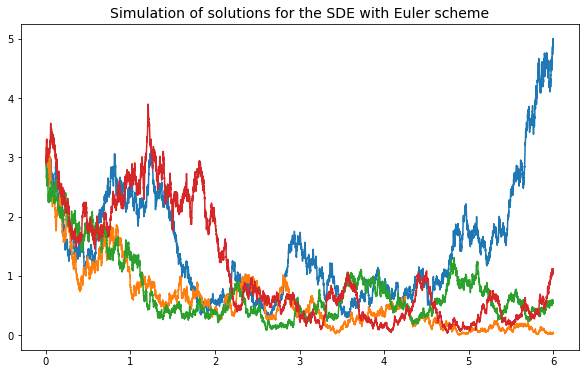

In [35]:
plt.figure(figsize=(10,6))
t = np.linspace(0, T, N+1)
plt.plot(t, paths[0, :])
plt.plot(t, paths[1, :])
plt.plot(t, paths[2, :])
plt.plot(t, paths[3, :])
plt.title('Simulation of solutions for the SDE with Euler scheme', fontsize=14)

In [36]:
def generate_paths(alpha, beta, gamma, X0, T, N, M, sigma, seed):
    step = T / N
    np.random.seed(seed)
    Z = np.random.normal(0, 1, size=(M, N))
    paths = np.zeros((M, N+1))
    paths[:, 0] = X0
    for i in range(1, N+1, 1):
        paths[:, i] = paths[:, i-1] + alpha * (beta - paths[:, i-1]) * step + sigma * paths[:, i-1] ** gamma * np.sqrt(step) * Z[:, i-1]
    return paths

In [37]:
paths = generate_paths(1, 1, 0.5, 2, 5, 10**3, 10, 1, 7)

Text(0.5, 1.0, 'Simulation of solutions for the SDE with Euler scheme \n gamma = 0.5, alpha = 1, beta = 1, sigma = 1')

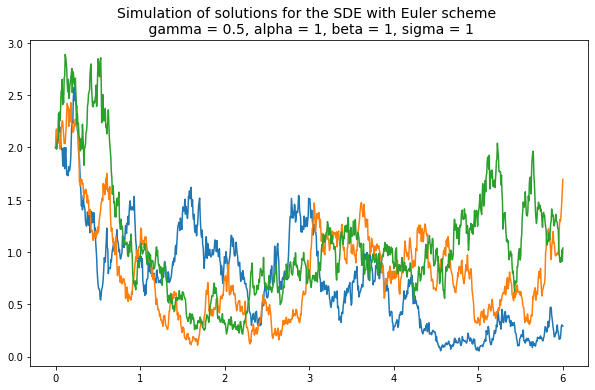

In [38]:
plt.figure(figsize=(10,6))
t = np.linspace(0, T, 10**3+1)
plt.plot(t, paths[1, :])
plt.plot(t, paths[3, :])
plt.plot(t, paths[5, :])
plt.title("Simulation of solutions for the SDE with Euler scheme \n gamma = 0.5, alpha = 1, beta = 1, sigma = 1", 
          fontsize=14)

**Example: Multi-dimensional/multi-factor models**

\begin{align*}
dr_t &= \alpha(\mu-r_t)dt + \sqrt{\nu_t}dW_t^{(1)}\\
d\nu_t &= \beta(\bar{\mu}-\nu_t)dt+\sigma\sqrt{\nu_t}dW_t^{(2)}
\end{align*}

**Euler scheme steps**:
1. $\Delta t = \frac{T}{N}, \tilde{r}_{t_0}=r_0, \tilde{\nu}_{t_0}=\nu_0$.
2. for $j=1, \dots, N$, \begin{align}
\tilde{r}_{t_j} &= \tilde{r}_{t_{j-1}} + \alpha(\mu-\tilde{r}_{t_{j-1}})\Delta t + \sqrt{\tilde{\nu}_{t_{j-1}}}\sqrt{\Delta t}Z_j^{(1)}\\
\tilde{\nu}_{t_j} &= \tilde{\nu}_{t_{j-1}}+\beta(\bar{\mu}-\tilde{\nu}_{t_{j-1}})\Delta t+\sigma\sqrt{\tilde{\nu}_{t_{j-1}}}\sqrt{\Delta t}Z_j^{(2)},
\end{align}
where $\{(Z_j^{(1)}, Z_j^{(2)}\}_{j=1}^N$ are from i.i.d bivariate (2-dim) normal distribution with covariance matrix $\Sigma=\begin{bmatrix} 1 & \rho\\ \rho & 1\end{bmatrix}$, $\rho\in(-1,1)$. To achieve this, we can let $\{Y_j^{(1)}\}_{j=1}^N, \{Y_j^{(2)}\}_{j=1}^N$ be two independent sequences of i.i.d $\mathcal{N}(0,1)$ random variables. Then define $Z_j^{(1)} = Y_j^{(1)}$ and $Z_j^{(2)}=\rho Y_j^{(1)} + \sqrt{1-\rho^2}Y_j^{(2)}$.

In [39]:
alpha = 0.2; beta = 0.5; mu = 1; bmu = 2;
r0 = 10; v0 = 15; T = 10; N = 10000
M = 10 #10 sample path pairs
sigma = 0.1
rho = 0.3
dt = T / N

In [40]:
np.random.seed(111)
Y = np.random.normal(0, 1, size=(M, 2 * N))
Z1 = Y[:, 0:N]
Z2 = rho * Y[:, 0:N] + np.sqrt(1 - rho ** 2) * Y[:, N:]

In [41]:
r = np.zeros((M, N+1))
v = np.zeros((M, N+1))
r[:, 0] = r0
v[:, 0] = v0
for i in range(1, N+1, 1):
    r[:, i] = r[:, i-1] + alpha * (mu - r[:, i-1]) * dt + np.sqrt(v[:, i-1]) * np.sqrt(dt) * Z1[:, i-1]
    v[:, i] = v[:, i-1] + beta * (bmu - v[:, i-1]) * dt + sigma * np.sqrt(v[:, i-1]) * np.sqrt(dt) * Z2[:, i-1]

In [42]:
r.shape

(10, 10001)

In [43]:
v.shape

(10, 10001)

Text(0.5, 1.0, 'Simulation of solutions (r) for the multi factor model with Euler scheme')

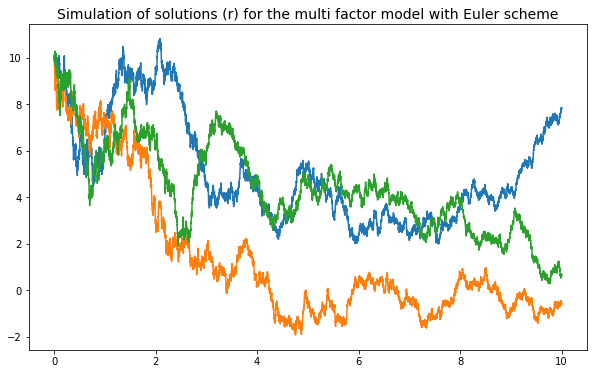

In [44]:
plt.figure(figsize=(10,6))
t = np.linspace(0, T, N+1)
plt.plot(t, r[0, :])
plt.plot(t, r[1, :])
plt.plot(t, r[2, :])
plt.title('Simulation of solutions (r) for the multi factor model with Euler scheme', fontsize=14)

Text(0.5, 1.0, 'Simulation of solutions (v) for the multi factor model with Euler scheme')

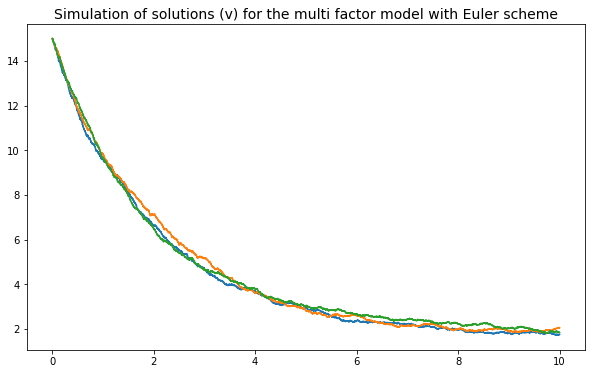

In [45]:
plt.figure(figsize=(10,6))
t = np.linspace(0, T, N+1)
plt.plot(t, v[0, :])
plt.plot(t, v[1, :])
plt.plot(t, v[2, :])
plt.title('Simulation of solutions (v) for the multi factor model with Euler scheme', fontsize=14)

## Milstein Scheme

Higher order correction scheme to the Euler scheme.

**Milstein Approximation for $dX_t = \mu(t,X_t)dt+\sigma(t, X_t)dW_t$**

\begin{equation}
\tilde{X}_{t_j}=\tilde{X}_{t_{j-1}}+\mu(t_{j-1}, \tilde{X}_{t_{j-1}})\Delta t + \sigma(t_{j-1}, \tilde{X}_{t_{j-1}})\sqrt{\Delta t}Z_j + \frac{1}{2}\sigma(t_{j-1}, \tilde{X}_{t_{j-1}})\sigma_x(t_{j-1}, \tilde{X}_{t_{j-1}})\Delta t(Z_j^2 - 1),
\end{equation}
where $\{Z_j\}_{j=1}^N$ are i.i.d $\mathcal{N}(0,1)$ random variables.

**Example: Milstein Approximation for Geometric Brownian Motion**

Idea: $\Delta X_t \approx \mu X_t\Delta t + \sigma X_t \Delta W_t + 0.5\sigma^2 X_t\Delta t(Z_j^2 - 1)$

Steps:
1. $\tilde{X}_0 = X_0$
2. $\tilde{X}_{t_j} = \tilde{X}_{t_{j-1}}+\mu\tilde{X}_{t_{j-1}}\Delta t+\sigma\tilde{X}_{t_{j-1}}\sqrt{\Delta t}Z_j + 0.5\sigma^2 \tilde{X}_{t_{j-1}}\Delta t(Z_j^2 - 1)$ where $\{Z_j, j=1, \dots, N\}$ are i.i.d. $\mathcal{N}(0,1)$.
3. For $t\in[0,T]$, let $\tilde{X}_t=\tilde{X}_{t_{j-1}}$ for $t_{j-1}\leq t<t_j$. 

In [46]:
# SDE model parameters
mu, sigma, X0 = 1, 1, 2

# Simulation parameters
T, N = 6, 2**8
dt = T / N
t = np.arange(dt, T + dt, dt)  # Start at dt because Y = X0 at t = 0

In [47]:
# Create Brownian Motion
np.random.seed(5)
Z = np.random.normal(0, 1, N)
B  = np.cumsum(np.sqrt(dt) * Z)

In [48]:
# Exact Solution
Y = X0 * np.exp((mu - 0.5*sigma**2) * t + (sigma * B))

In [49]:
# Euler Scheme 
X_eu, X = [], X0
for j in range(N):  
    X += mu * X * dt + sigma * X * np.sqrt(dt) * Z[j]
    X_eu.append(X)

In [50]:
# Milstein Scheme 
X_mil, X = [], X0
for j in range(N):  
    X += mu * X * dt + sigma * X * np.sqrt(dt) * Z[j] + 0.5 * sigma ** 2 * X * dt * (Z[j] ** 2 - 1)
    X_mil.append(X)

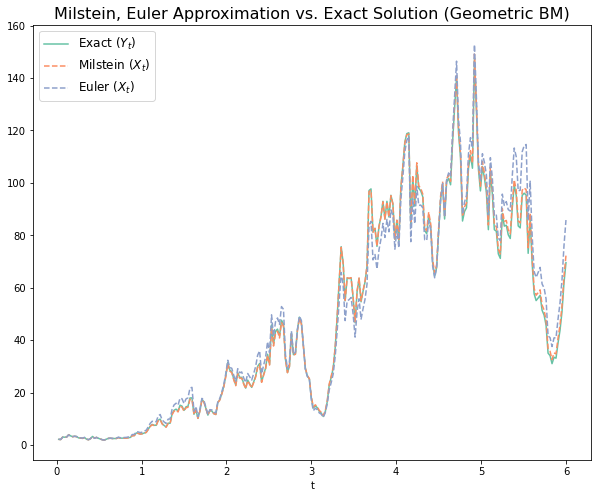

In [51]:
# create a color palette
palette = plt.get_cmap('Set2')
plt.figure(figsize=(10, 8))
# Plot
plt.plot(t, Y, label="Exact ($Y_t$)",color=palette(0))
plt.plot(t, X_mil, label="Milstein ($X_t$)",color=palette(1), ls='--')
plt.plot(t, X_eu, label="Euler ($X_t$)",color=palette(2), ls='--')
plt.title('Milstein, Euler Approximation vs. Exact Solution (Geometric BM)', fontsize=16)
plt.xlabel('t'); plt.legend(loc=2, prop={'size': 12});

###  Appendix
#### Convergence
- Weak Convergence: As $\Delta t\to0$, $error^w(\Delta t)=\sup_{t_j}|E(X(t_j) - E(Y(t_j))|$, goes to zero.
- Strong Convergence: As $\Delta t\to0$, $error^s(\Delta t) = E(\sup_{t_j}|X(t_j)-Y(t_j)|)$, goes to zero.

We now compute the above error terms for the Euler Scheme and Milstein Scheme for a range of $\Delta t$ values.
Specifically, we simulate 10000 sample paths for each value of $\Delta t$, compute the errors and plot the weak and strong error terms for each approximation against $\Delta t$ values.

In [ ]:
# Initiate dt grid and lists to store errors
strong_err_eu, strong_err_mil, weak_err_eu, weak_err_mil = [], [], [], []
dt_grid = [2 ** (R-10) for R in range(6, -1, -1)]
M = 1000

# Look through values of dt
for dt in dt_grid:
    # Given dt
    # Setup discretized grid 
    t = np.arange(dt, T + dt, dt)
    N = len(t) # N steps in a sample path
    
    # Initiate vectors to store errors and time series (along N steps)
    err_eu, err_mil = [], []
    Y_sum, X_eu_sum, X_mil_sum = np.zeros(N), np.zeros(N), np.zeros(N)
    
    # Generate sample paths (M in total)
    for i in range(M):
        # Create Brownian Motion
        np.random.seed(i)
        Z = np.random.normal(0, 1, N)
        B  = np.cumsum(np.sqrt(dt) * Z)
        
        # Exact solution
        Y = X0 * np.exp((mu - 0.5*sigma**2) * t + (sigma * B))
        
        # Simulate stochastic processes
        Xeut, Xmilt, X_eu, X_mil = X0, X0, [], []
        for j in range(N):

            # Euler Scheme
            Xeut += mu * Xeut * dt + sigma * Xeut * np.sqrt(dt) * Z[j]
            X_eu.append(Xeut)
            
            # Milstein Scheme
            Xmilt += mu * Xmilt * dt + sigma * Xmilt * np.sqrt(dt) * Z[j] + 0.5 * sigma ** 2 * Xmilt * dt * (Z[j] ** 2 - 1)
            X_mil.append(Xmilt)
            
        # Compute strong errors of a sample path and add to those across from other sample paths
        err_eu.append(max(abs(Y - X_eu)))
        err_mil.append(max(abs(Y - X_mil)))
        
        # Add Y and X values to previous sample paths
        Y_sum += Y
        X_eu_sum += X_eu
        X_mil_sum += X_mil
        
    # Compute mean of absolute errors and find maximum (strong error)
    strong_err_eu.append(np.mean(err_eu))
    strong_err_mil.append(np.mean(err_mil))
    
    # Compute error of means and find maximum (weak error)
    weak_err_eu.append(max(abs(Y_sum - X_eu_sum)/M))
    weak_err_mil.append(max(abs(Y_sum - X_mil_sum)/M))

In [ ]:
# plt.figure(figsize=(10, 8))
plt.plot([T/d for d in dt_grid], strong_err_eu, label="Euler Scheme - Strong Error",color=palette(0))
plt.plot([T/d for d in dt_grid], weak_err_eu, label="Euler Scheme - Weak Error",color=palette(0),ls='--')
plt.plot([T/d for d in dt_grid], strong_err_mil, label="Milstein Scheme - Strong Error",color=palette(1))
plt.plot([T/d for d in dt_grid], weak_err_mil, label="Milstein Scheme - Weak Error",color=palette(1),ls='--')
plt.title('Convergence of SDE Approximations')
plt.xlabel('$T/\Delta t$'); plt.ylabel('Error (e($\Delta t$))'); plt.legend(loc=1);

In [ ]:
# plt.figure(figsize=(10, 8))
plt.loglog([T/d for d in dt_grid], strong_err_eu, label="Euler Scheme - Strong Error",color=palette(0))
plt.loglog([T/d for d in dt_grid], weak_err_eu, label="Euler Scheme - Weak Error",color=palette(0),ls='--')
plt.loglog([T/d for d in dt_grid], strong_err_mil, label="Milstein Scheme - Strong Error",color=palette(1))
plt.loglog([T/d for d in dt_grid], weak_err_mil, label="Milstein Scheme - Weak Error",color=palette(1),ls='--')
plt.title('Convergence of SDE Approximations')
plt.xlabel('$T/\Delta t$'); plt.ylabel('Error (e($\Delta t$))'); plt.legend(loc=3);